1. y'' = sin(x)
1) Построить разностный аналог
2) Решить его методом прогонки
Сравнить с аналитическим решением для некоторых гран условий
Реализовать различные виды гран условий y,y
y,y'
y',y'

In [345]:
import scipy.linalg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *

In [346]:
h = 0.005
p = 0
q = 1
n = int((q - p)/h)
p_bound = 0
q_bound = 0

In [347]:
n

200

In [348]:
variables = n - 1
intervals = n
points = n + 1
alphas = n - 2

In [349]:
def get_coefficients(h,p,q,p_bound,q_bound, variables):
    d = [None]*variables
    d[0] = sin(p + h)*h*h - p_bound
    for i in range(1, variables - 1):
        d[i] = sin(p + (i+1)*h)*h*h
    d[variables - 1] = sin(p + variables*h)*h*h - q_bound
    a = [1 for i in range(variables)]
    a[0] = 0
    b = [-2 for i in range(variables)]
    c = [1 for i in range(variables)]
    c[n-2] = 0
    return a,b,c,d

In [350]:
def tdma(a, b, c, d):
    n = len(b)
    x = np.zeros(n)  
    for k in range(1,n):
        q = a[k]/b[k-1]
        b[k] = b[k] - c[k-1]*q
        d[k] = d[k] - d[k-1]*q   
    q = d[n-1]/b[n-1]
    x[n-1] = q  
    for k in range(n-2,-1,-1):
        q = (d[k]-c[k]*q)/b[k]
        x[k] = q
    return x

In [351]:
a, b, c, d = get_coefficients(h,p,q,p_bound,q_bound,variables)
x = tdma(a,b,c,d)
y = []
y.append(p_bound)
for obj in x:
    y.append(obj)
y.append(q_bound)

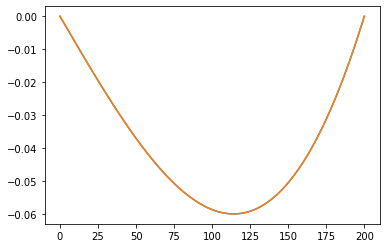

In [352]:
plt.plot(figsize = (20,10))
plt.plot(y)
plt.plot([sin(1)*(i*h) - sin(i*h) for i in range(201)])

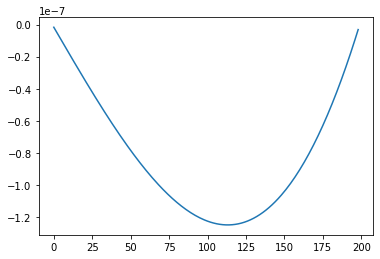

In [353]:
t = [sin(1)*(i*h) - sin(i*h) for i in range(201)]
delta = (np.array(y) - np.array(t))
sup1 = np.max(abs(delta[1:-1]))
plt.plot(np.array(y[1:-1]) - np.array(t[1:-1]))

In [354]:
#Cразу смотрим порядок сходимости

In [355]:
h = 0.0025
p = 0
q = 1
n = int((q - p)/h)
p_bound = 0
q_bound = 0
variables = n - 1
intervals = n
points = n + 1
alphas = n - 2

In [356]:
a, b, c, d = get_coefficients(h,p,q,p_bound,q_bound,variables)
x = tdma(a,b,c,d)
y = []
y.append(p_bound)
for obj in x:
    y.append(obj)
y.append(q_bound)

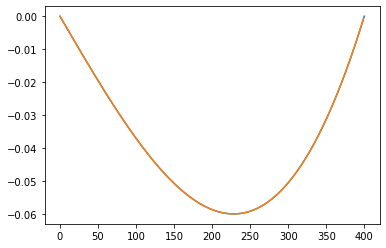

In [357]:
plt.plot(figsize = (20,10))
plt.plot(y)
plt.plot([sin(1)*(i*h) - sin(i*h) for i in range(400)])

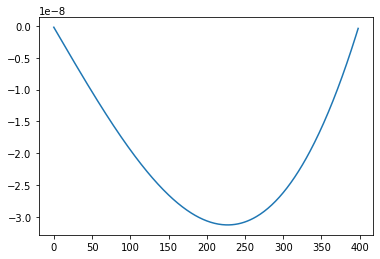

In [358]:
t = [sin(1)*(i*h) - sin(i*h) for i in range(401)]
delta = (np.array(y) - np.array(t))
sup2 = np.max(abs(delta[1:-1]))
plt.plot(np.array(y[1:-1]) - np.array(t[1:-1]))

In [359]:
sup1/sup2

4.000003324361637

In [360]:
h = 0.00125
p = 0
q = 1
n = int((q - p)/h)
p_bound = 0
q_bound = 0
variables = n - 1
intervals = n
points = n + 1
alphas = n - 2

In [361]:
a, b, c, d = get_coefficients(h,p,q,p_bound,q_bound,variables)
x = tdma(a,b,c,d)
y = []
y.append(p_bound)
for obj in x:
    y.append(obj)
y.append(q_bound)

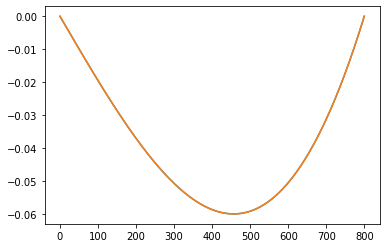

In [362]:
plt.plot(y)
plt.plot([sin(1)*(i*h) - sin(i*h) for i in range(801)])

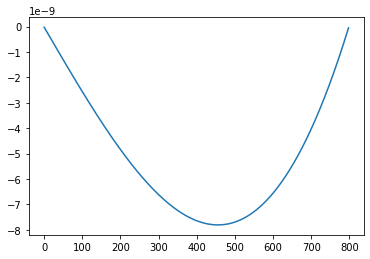

In [363]:
t = [sin(1)*(i*h) - sin(i*h) for i in range(801)]
delta = (np.array(y) - np.array(t))
sup3 = np.max(abs(delta[1:-1]))
plt.plot(np.array(y[1:-1]) - np.array(t[1:-1]))

In [365]:
sup2/sup3

4.000002804279771

In [397]:
h = pi/50000
p = pi
q = 2*pi
n = int((q - p)/h)
print(n)
p_bound = 1
q_bound = -1
variables = n - 1
intervals = n
points = n + 1
alphas = n - 2

50000


In [398]:
a, b, c, d = get_coefficients(h, p, q, p_bound, q_bound,variables)
x = tdma(a,b,c,d)

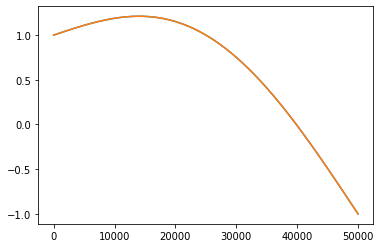

In [399]:
plt.plot(x)
plt.plot([-2/pi*(pi + i*h) + 3 - sin(pi + i*h) for i in range(50000)])

In [439]:
h = 0.00125
p = 0
q = 1
n = int((q - p)/h)
p_bound = 1
q_bound = 0
variables = n - 1
intervals = n
points = n + 1
alphas = n - 2

In [440]:
def get_coefficients_1(h,p,q,p_bound,q_bound,variables):
    d = [None]*variables
    d[0] = sin(p + h)*h*h - p_bound
    for i in range(1, variables - 1):
        d[i] = sin(p + (i+1)*h)*h*h
    d[variables - 1] = sin(p + variables*h)*h*h - q_bound*h
    a = [1 for i in range(variables)]
    a[0] = 0
    b = [-2 for i in range(variables)]
    b[-1] = -1
    c = [1 for i in range(variables)]
    c[n-2] = 0
    return a,b,c,d

In [441]:
def tdma(a1, b1, c1, d1):
    n = len(b1)
    x = np.zeros(n)  
    for k in range(1,n):
        q = a1[k]/b1[k-1]
        b1[k] = b1[k] - c1[k-1]*q
        d1[k] = d1[k] - d1[k-1]*q   
    q = d1[n-1]/b1[n-1]
    x[n-1] = q  
    for k in range(n-2,-1,-1):
        q = (d1[k]-c1[k]*q)/b1[k]
        x[k] = q
    return x

In [442]:
a, b, c, d = get_coefficients_1(h,p,q,p_bound,q_bound,variables)
x = tdma(a,b,c,d)
y = []
y.append(p_bound)
for obj in x:
    y.append(obj)

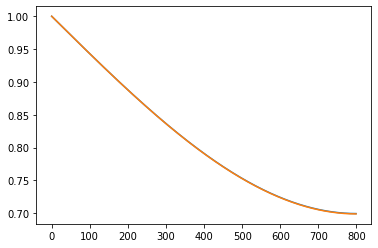

In [443]:
plt.plot(y)
plt.plot([cos(1)*(i*h) + 1 - sin(i*h) for i in range(n)])

In [475]:
t = [cos(1)*(i*h) + 1 - sin(i*h) for i in range(n)]
delta = (np.array(y) - np.array(t))

In [509]:
def get_coefficients_2(h,p,q,p_bound,q_bound,variables):
    d = [None]*variables
    d[0] = sin(p + h)*h*h + p_bound*h
    for i in range(1, variables - 1):
        d[i] = sin(p + (i+1)*h)*h*h
    d[variables - 1] = sin(p + variables*h)*h*h - q_bound
    a = [1 for i in range(variables)]
    a[0] = 0
    b = [-2 for i in range(variables)]
    b[0] = -1
    c = [1 for i in range(variables)]
    c[n-2] = 0
    return a,b,c,d

In [510]:
h = 0.00025
p = 0
q = 1
n = int((q - p)/h)
p_bound = 1
q_bound = 3
variables = n - 1
intervals = n
points = n + 1
alphas = n - 2

In [511]:
a, b, c, d = get_coefficients_2(h,p,q,p_bound,q_bound,variables)
print(b[0])
x = tdma(a,b,c,d)
y = []
for obj in x:
    y.append(obj)
y.append(q_bound)

-1


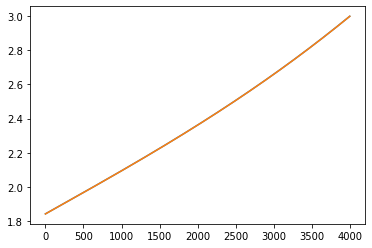

In [514]:
plt.plot(y)
plt.plot([2*(i*h) + sin(1) + 1 - sin(i*h) for i in range(n)])

In [515]:
#был выполнен метод прогонки с граничными условиями y,y; y,y', y',y